# Personal Loan Modeling in Banking

# Exploratory Data Analysis
## Loading the Libraries

In [49]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

pd.plotting.register_matplotlib_converters()
%matplotlib inline
plt.style.use('seaborn-whitegrid')
pd.set_option('display.max_columns', 500)
warnings.filterwarnings("ignore")

In [50]:
# Read the Data
data = pd.read_csv('C:/Users/Supraja/Desktop/Supraja WORK Apps/7.DSC630/Term Project/Bank_Personal_Loan_Modelling.csv')
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [51]:
# let's explore the shape of the data. 
data.shape

(5000, 14)

In [52]:
# Let's Check if the data contains any missing or NaN values.
data.isnull().any()

ID                    False
Age                   False
Experience            False
Income                False
ZIP Code              False
Family                False
CCAvg                 False
Education             False
Mortgage              False
Personal Loan         False
Securities Account    False
CD Account            False
Online                False
CreditCard            False
dtype: bool

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


 - We see that a lot of categorical columns are being treated as integer datatypes. We'd like to convert them to categorical for our analysis.
 - First, we'd like to drop 2 columns that we think are not relevant to the prediction: 'ID' and 'ZIP Code'

In [54]:
data.drop(['ID', 'ZIP Code'], axis = 1, inplace = True)

## 2.2 Data Preparation

In [55]:
data.isnull().sum()

Age                   0
Experience            0
Income                0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [56]:
# Dividing the columns in the dataset in to numeric and categorical attributes.
cols = set(data.columns)
cols_numeric = set(['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage'])
cols_categorical = list(cols - cols_numeric)
cols_categorical

['Securities Account',
 'Online',
 'Family',
 'CreditCard',
 'Education',
 'Personal Loan',
 'CD Account']

In [57]:
for x in cols_categorical:
    data[x] = data[x].astype('category')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 5000 non-null   int64   
 1   Experience          5000 non-null   int64   
 2   Income              5000 non-null   int64   
 3   Family              5000 non-null   category
 4   CCAvg               5000 non-null   float64 
 5   Education           5000 non-null   category
 6   Mortgage            5000 non-null   int64   
 7   Personal Loan       5000 non-null   category
 8   Securities Account  5000 non-null   category
 9   CD Account          5000 non-null   category
 10  Online              5000 non-null   category
 11  CreditCard          5000 non-null   category
dtypes: category(7), float64(1), int64(4)
memory usage: 230.6 KB


In [58]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0


## 2.3 Data Visualization

In [59]:
data_num = data.select_dtypes(include='number')
data_cat = data.select_dtypes(include='category')
print(f'Numerical Attributes: {list(data_num.columns)}')
print(f'Categorical Attributes: {list(data_cat.columns)}')

Numerical Attributes: ['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']
Categorical Attributes: ['Family', 'Education', 'Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard']


### 2.3.1 Univariate Analysis - Numerical Attributes

In [60]:
# Let's construct a function that shows the summary and density distribution of a numerical attribute:
def summary(x):
    x_min = data[x].min()
    x_max = data[x].max()
    Q1 = data[x].quantile(0.25)
    Q2 = data[x].quantile(0.50)
    Q3 = data[x].quantile(0.75)
    print(f'5 Point Summary of {x.capitalize()} Attribute:\n'
          f'{x.capitalize()}(min) : {x_min}\n'
          f'Q1                    : {Q1}\n'
          f'Q2(Median)            : {Q2}\n'
          f'Q3                    : {Q3}\n'
          f'{x.capitalize()}(max) : {x_max}')

    fig = plt.figure(figsize=(16, 10))
    plt.subplots_adjust(hspace = 0.6)
    sns.set_palette('pastel')
    
    plt.subplot(221)
    ax1 = sns.distplot(data[x], color = 'r')
    plt.title(f'{x.capitalize()} Density Distribution')
    
    plt.subplot(222)
    ax2 = sns.violinplot(x = data[x], palette = 'Accent', split = True)
    plt.title(f'{x.capitalize()} Violinplot')
    
    plt.subplot(223)
    ax2 = sns.boxplot(x=data[x], palette = 'cool', width=0.7, linewidth=0.6)
    plt.title(f'{x.capitalize()} Boxplot')
    
    plt.subplot(224)
    ax3 = sns.kdeplot(data[x], cumulative=True)
    plt.title(f'{x.capitalize()} Cumulative Density Distribution')
    
    plt.show()

5 Point Summary of Age Attribute:
Age(min) : 23
Q1                    : 35.0
Q2(Median)            : 45.0
Q3                    : 55.0
Age(max) : 67


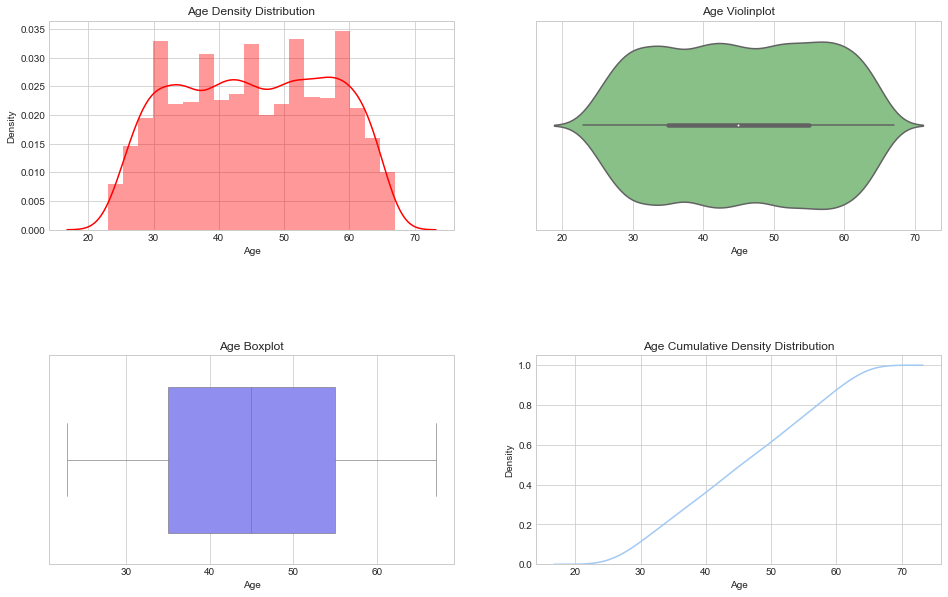

In [61]:
summary('Age')

### Observation:
 - We see that the age of the customers are uniformly distributed between the Min age of 23 and Max age of 67.

5 Point Summary of Experience Attribute:
Experience(min) : -3
Q1                    : 10.0
Q2(Median)            : 20.0
Q3                    : 30.0
Experience(max) : 43


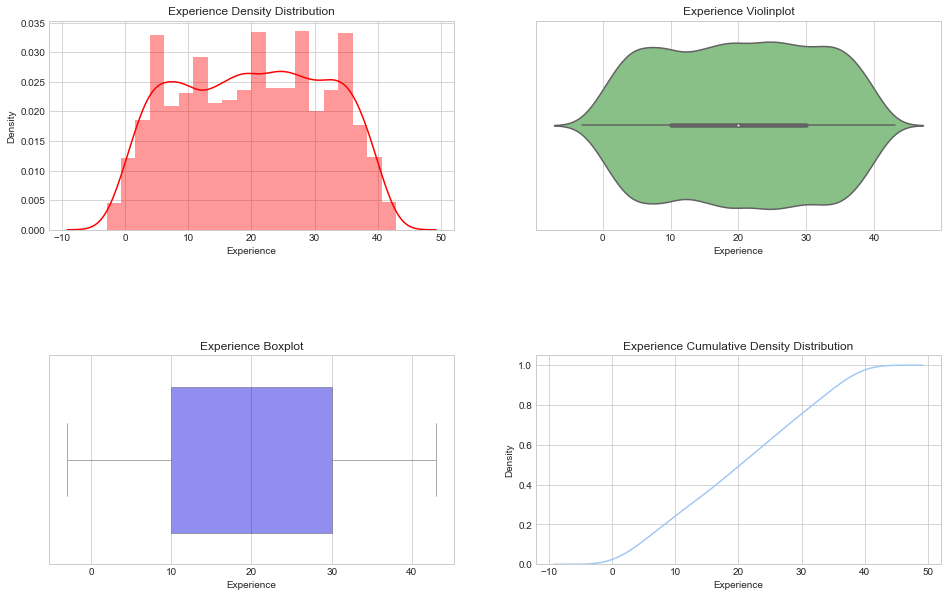

In [62]:
summary('Experience')

### Observation:
 - We see that the work experience of the customers are uniformly distributed between the Minimum of -3 and Maximum of 43.

5 Point Summary of Income Attribute:
Income(min) : 8
Q1                    : 39.0
Q2(Median)            : 64.0
Q3                    : 98.0
Income(max) : 224


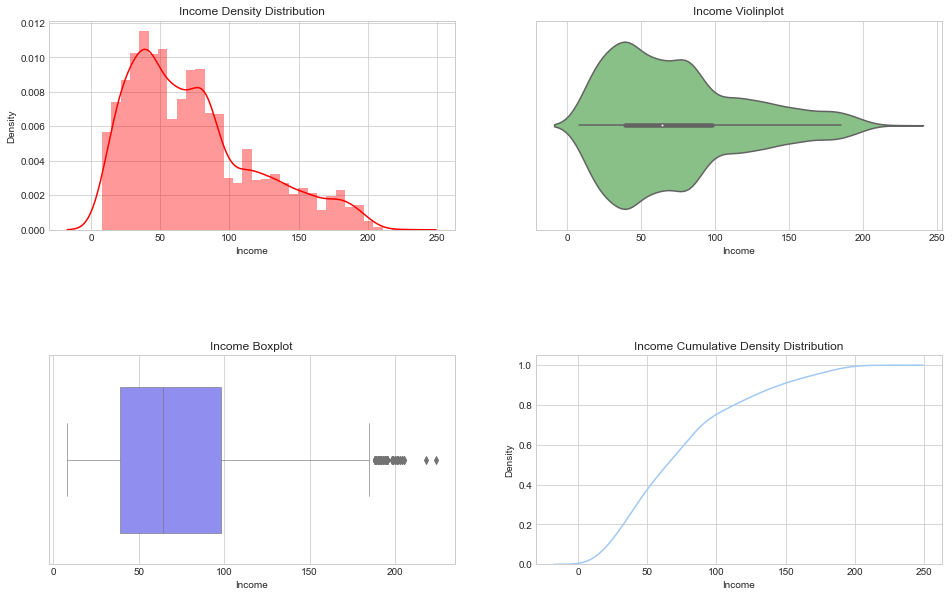

In [63]:
summary('Income')

### Observation:
 - We see that the income of the customers are skewed to the left with a median income of $64,000.
 - The Income attribute also has a lot of outlier values.

5 Point Summary of Ccavg Attribute:
Ccavg(min) : 0.0
Q1                    : 0.7
Q2(Median)            : 1.5
Q3                    : 2.5
Ccavg(max) : 10.0


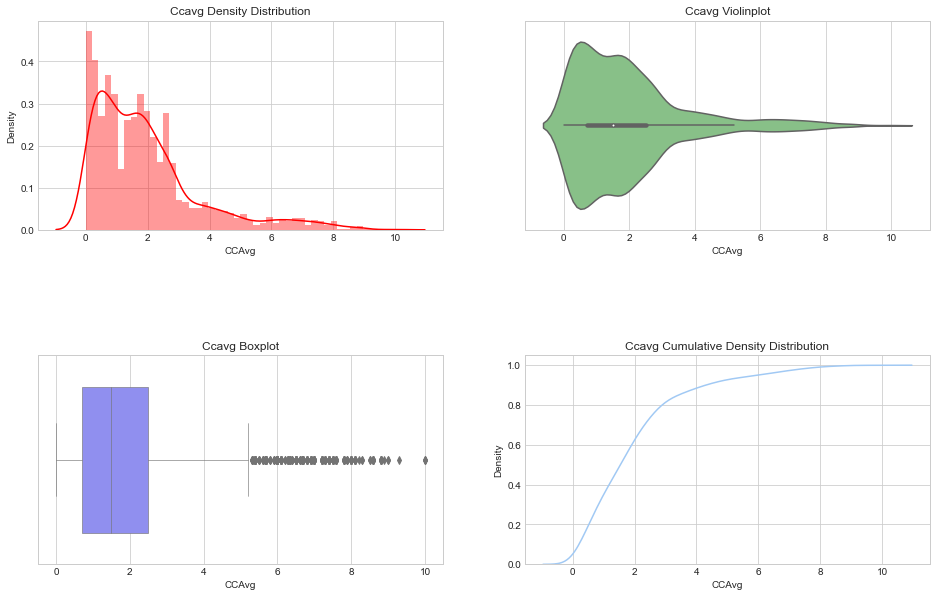

In [64]:
summary('CCAvg')

### Observation:
 - We see that the Average Monthly Credit Card spending of the customers are skewed heavily to the left, with a lot of outlier values.

5 Point Summary of Mortgage Attribute:
Mortgage(min) : 0
Q1                    : 0.0
Q2(Median)            : 0.0
Q3                    : 101.0
Mortgage(max) : 635


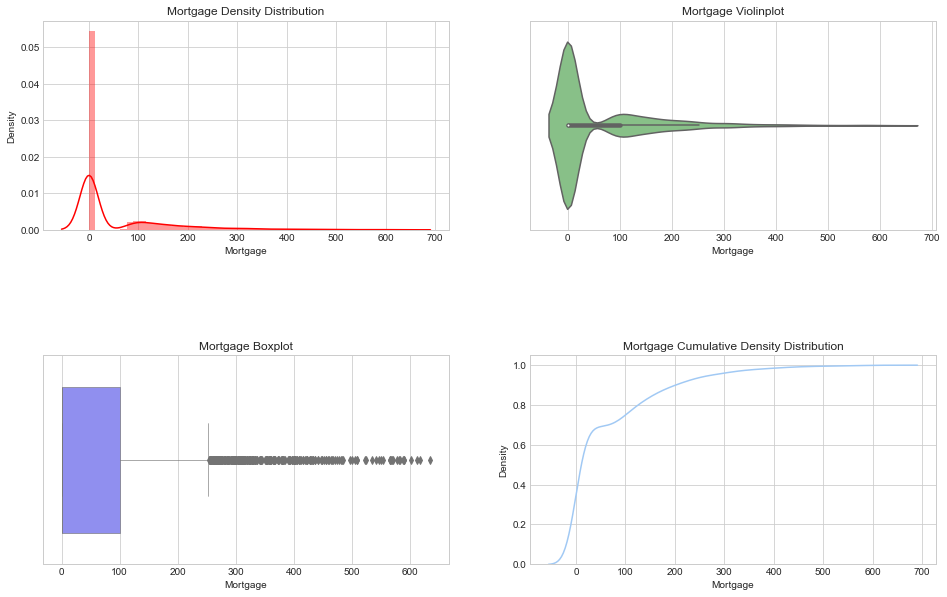

In [65]:
summary('Mortgage')

### Observation:
 - We see that the Mortgage amount of the customers are skewed heavily to the left, with a lot of outlier values.
 - The nature of distribution of numerical columns suggest that we may need to standardize the data before training our models.

### 2.3.2 Univariate Analysis - Categorical Attributes

In [66]:
# Create a function that returns a Pie chart and a Bar Graph for the categorical variables:
def cat_view(x = 'Education'):
    """
    Function to create a Bar chart and a Pie chart for categorical variables.
    """
    from matplotlib import cm
    color1 = cm.inferno(np.linspace(.4, .8, 30))
    color2 = cm.viridis(np.linspace(.4, .8, 30))
    
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    
     
    """
    Draw a Pie Chart on first subplot.
    """    
    s = data.groupby(x).size()

    mydata_values = s.values.tolist()
    mydata_index = s.index.tolist()

    def func(pct, allvals):
        absolute = int(pct/100.*np.sum(allvals))
        return "{:.1f}%\n({:d})".format(pct, absolute)


    wedges, texts, autotexts = ax[0].pie(mydata_values, autopct=lambda pct: func(pct, mydata_values),
                                      textprops=dict(color="w"))

    ax[0].legend(wedges, mydata_index,
              title="Index",
              loc="center left",
              bbox_to_anchor=(1, 0, 0.5, 1))

    plt.setp(autotexts, size=12, weight="bold")

    ax[0].set_title(f'{x.capitalize()} Piechart')
    
    """
    Draw a Bar Graph on second subplot.
    """
    
    df = pd.pivot_table(data, index = [x], columns = ['Personal Loan'], values = ['Income'], aggfunc = len)

    labels = df.index.tolist()
    loan_no = df.values[:, 0].tolist()
    loan_yes = df.values[:, 1].tolist()
    
    l = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars

    rects1 = ax[1].bar(l - width/2, loan_no, width, label='No Loan', color = color1)
    rects2 = ax[1].bar(l + width/2, loan_yes, width, label='Loan', color = color2)

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax[1].set_ylabel('Scores')
    ax[1].set_title(f'{x.capitalize()} Bar Graph')
    ax[1].set_xticks(l)
    ax[1].set_xticklabels(labels)
    ax[1].legend()
    
    def autolabel(rects):
        
        """Attach a text label above each bar in *rects*, displaying its height."""
        
        for rect in rects:
            height = rect.get_height()
            ax[1].annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        fontsize = 'large',   
                        ha='center', va='bottom')


    autolabel(rects1)
    autolabel(rects2)

    fig.tight_layout()
    plt.show()

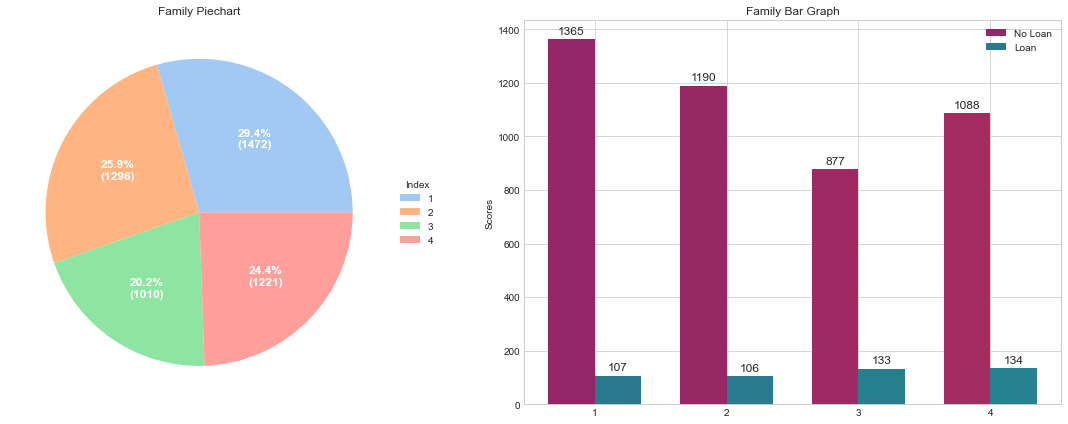

In [67]:
cat_view('Family')

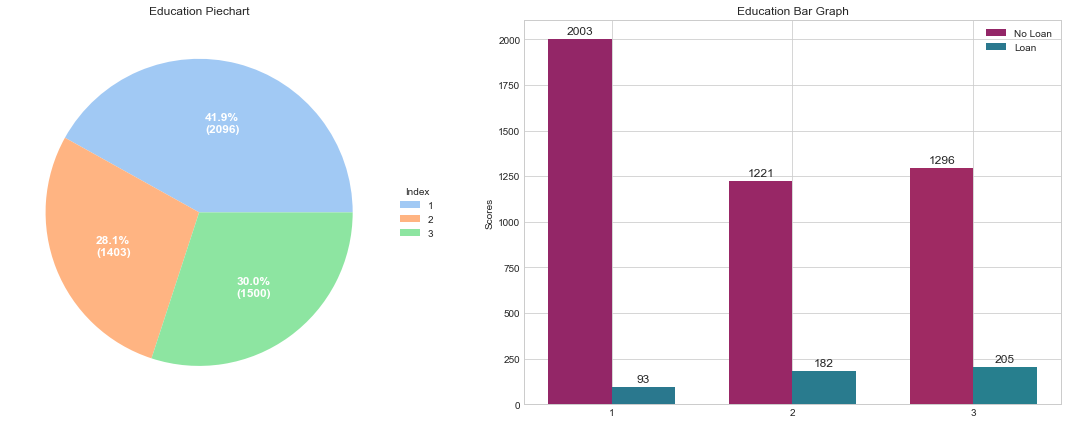

In [68]:
cat_view('Education')

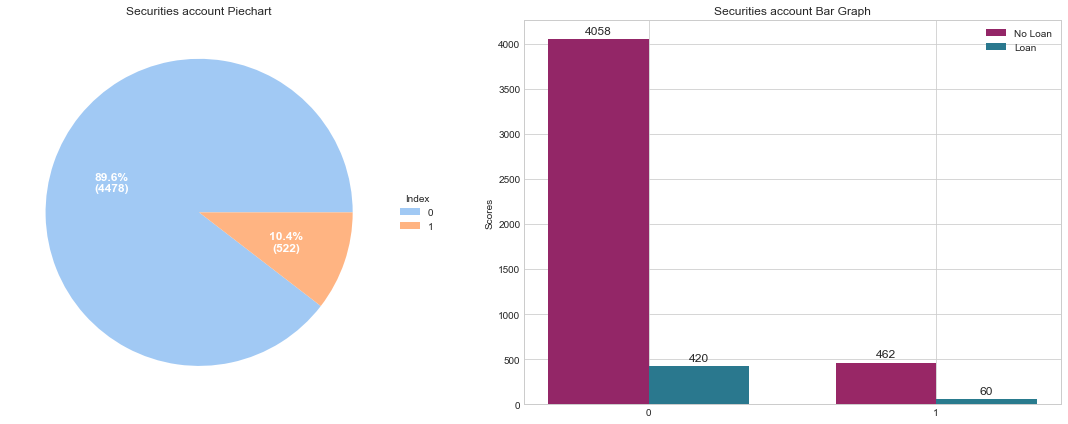

In [69]:
cat_view('Securities Account')

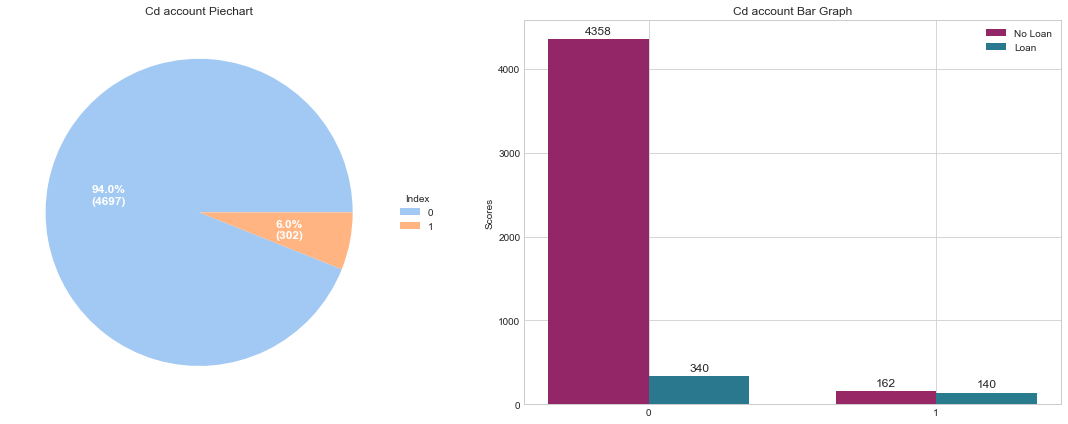

In [70]:
cat_view('CD Account')

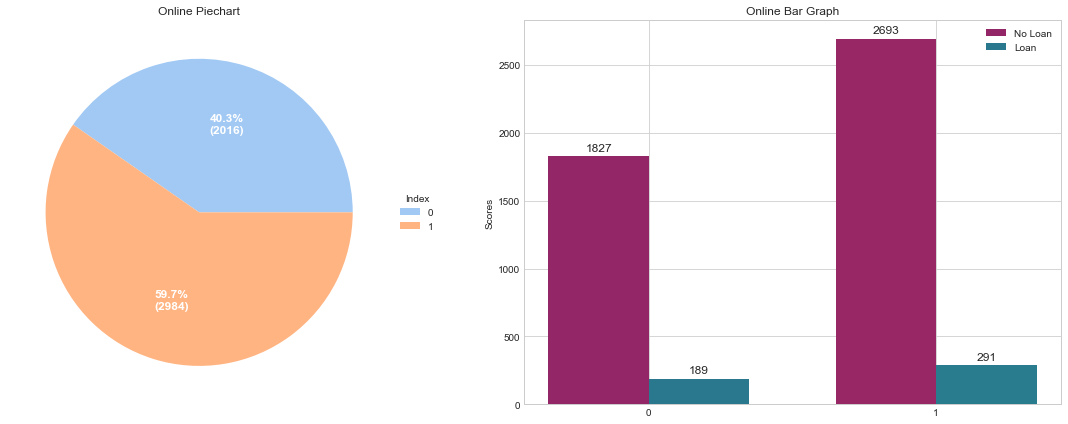

In [71]:
cat_view('Online')

### Observation:
 - The distribution of 'CD Account' and 'Securities Account' are heavily imbalanced. 

### Target Variable Distribution

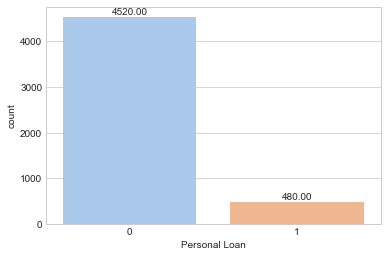

In [72]:
splot = sns.countplot(x = 'Personal Loan', data = data)

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

### 2.3.3 Multivariate Analysis

In [73]:
X = data.drop('Personal Loan', axis = 1)
Y = data[['Personal Loan']]

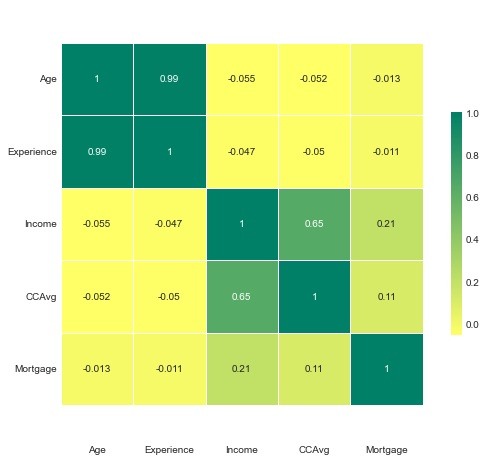

In [74]:
corr = X.corr()
plt.figure(figsize=(10, 8))
g = sns.heatmap(corr, annot=True, cmap = 'summer_r', square=True, linewidth=1, cbar_kws={'fraction' : 0.02})
g.set_yticklabels(g.get_yticklabels(), rotation=0, horizontalalignment='right')
bottom, top = g.get_ylim()
g.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

### Observation:
 - We see there is a very strong positive correlation between Age and Work Experience, which is expected.
 - There is also a positive correlation between Income and Credit Card spending.

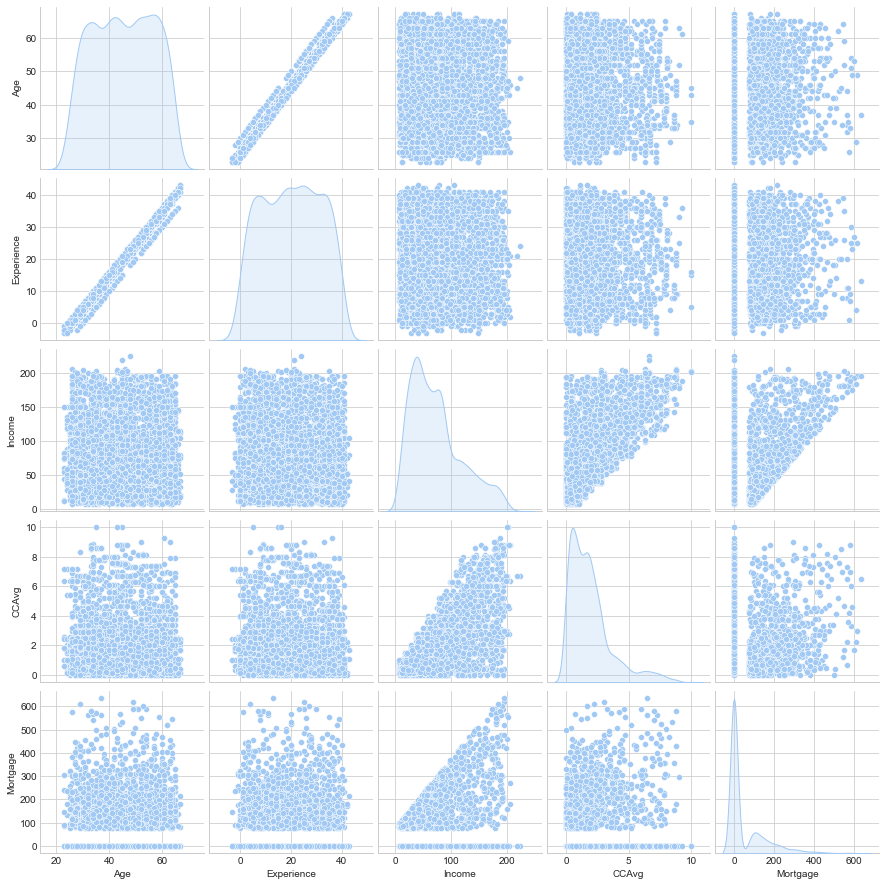

In [75]:
# Let's plot all Dependent variables to see their inter-relations.
sns.pairplot(X, diag_kind = 'kde', vars = list(data_num.columns))

# 3. Data Pre-processing
First, we create a train and a test set from the data.

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1, stratify = Y)

## 3.1 Handling Missing Values
As observed, there are no missing values in our dataset, so we can proceed to the next step.
## 3.2 Feature Selection

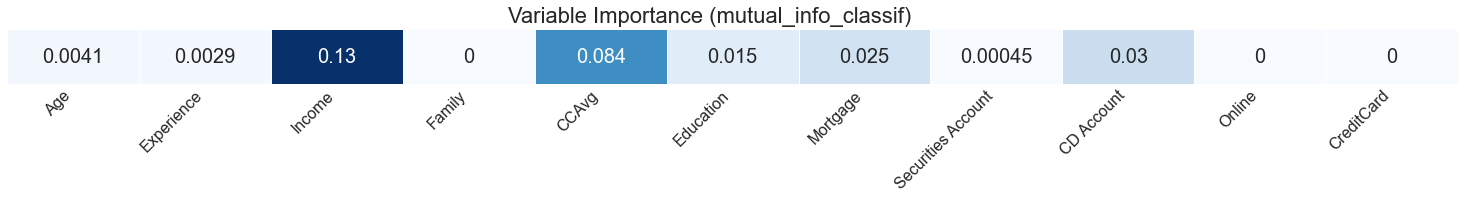

In [77]:
from sklearn.feature_selection import mutual_info_classif
mutual_information = mutual_info_classif(X_train, y_train, n_neighbors=5, copy = True)

plt.subplots(1, figsize=(26, 1))
sns.heatmap(mutual_information[:, np.newaxis].T, cmap='Blues', cbar=False, linewidths=1, annot=True, annot_kws={"size": 20})
plt.yticks([], [])
plt.gca().set_xticklabels(X_train.columns, rotation=45, ha='right', fontsize=16)
plt.suptitle("Variable Importance (mutual_info_classif)", fontsize=22, y=1.2)
plt.gcf().subplots_adjust(wspace=0.2)

Text(0.5, 0, 'Relative Importance')

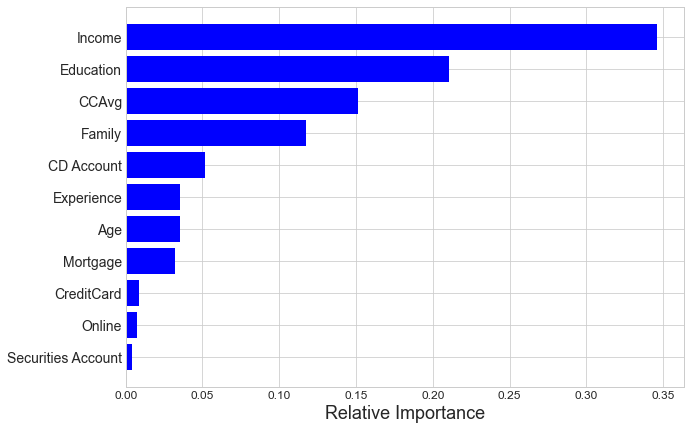

In [78]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=42)
rf_clf.fit(X_train, y_train)

features = list(X_train.columns)
importances = rf_clf.feature_importances_
indices = np.argsort(importances)

fig, ax = plt.subplots(figsize=(10, 7))
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
ax.tick_params(axis="x", labelsize=12)
ax.tick_params(axis="y", labelsize=14)
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance', fontsize = 18)

## 3.3 Transformation Pipeline

In [79]:
# from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

X_train_num = X_train.select_dtypes(include='number')
X_train_cat = X_train.select_dtypes(include='category')

num_attribs = list(X_train_num.columns)
cat_attribs = list(X_train_cat.columns)

transformer = ColumnTransformer([
        ("num", StandardScaler(), num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

X_train = transformer.fit_transform(X_train)
print(X_train.shape)
X_train[1, :]

(4000, 20)


array([ 1.54242379,  1.64860495, -1.09229452, -0.93991736, -0.55912257,
        0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  1.        ,  1.        ,  0.        ,  1.        ,
        0.        ,  1.        ,  0.        ,  1.        ,  0.        ])

In [80]:
y_train = np.array(y_train)
print(y_train.shape)

(4000, 1)


# 4. Training Models

In [81]:
def train_model(model):
    m = model[1]
    y_train_pred = cross_val_predict(model[1], X_train, y_train, cv=5)
    cm = confusion_matrix(y_train, y_train_pred)
    print('Confusion matrix: ' + model[0])
    print(cm)
    print()
    accuracy = accuracy_score(y_train, y_train_pred)
    precision = precision_score(y_train, y_train_pred)
    recall = recall_score(y_train, y_train_pred)
    f1 = f1_score(y_train, y_train_pred)
    print(f'{model[0]} Accuracy: {accuracy}')
    print(f'{model[0]} Precision: {precision}')
    print(f'{model[0]} Recall: {recall}')
    print(f'{model[0]} f1 - score: {f1}')

In [82]:
train_model(('Gaussian Naive Bayes', GaussianNB()))

Confusion matrix: Gaussian Naive Bayes
[[3411  205]
 [ 188  196]]

Gaussian Naive Bayes Accuracy: 0.90175
Gaussian Naive Bayes Precision: 0.48877805486284287
Gaussian Naive Bayes Recall: 0.5104166666666666
Gaussian Naive Bayes f1 - score: 0.49936305732484076


In [83]:
train_model(('Logistic Regression', LogisticRegression(solver="liblinear")))

Confusion matrix: Logistic Regression
[[3578   38]
 [ 124  260]]

Logistic Regression Accuracy: 0.9595
Logistic Regression Precision: 0.87248322147651
Logistic Regression Recall: 0.6770833333333334
Logistic Regression f1 - score: 0.7624633431085044


In [84]:
train_model(('k Nearest Neighbor', KNeighborsClassifier(n_neighbors= 7, weights = 'distance' )))

Confusion matrix: k Nearest Neighbor
[[3611    5]
 [ 177  207]]

k Nearest Neighbor Accuracy: 0.9545
k Nearest Neighbor Precision: 0.9764150943396226
k Nearest Neighbor Recall: 0.5390625
k Nearest Neighbor f1 - score: 0.6946308724832215


In [85]:
train_model(('SVM', SVC(gamma='auto')))

Confusion matrix: SVM
[[3615    1]
 [  87  297]]

SVM Accuracy: 0.978
SVM Precision: 0.9966442953020134
SVM Recall: 0.7734375
SVM f1 - score: 0.8709677419354839


In [86]:
train_model(('CART', DecisionTreeClassifier()))

Confusion matrix: CART
[[3571   45]
 [  40  344]]

CART Accuracy: 0.97875
CART Precision: 0.884318766066838
CART Recall: 0.8958333333333334
CART f1 - score: 0.890038809831824


In [87]:
train_model(('Random Forest', RandomForestClassifier(n_estimators=100, random_state=42)))

Confusion matrix: Random Forest
[[3608    8]
 [  46  338]]

Random Forest Accuracy: 0.9865
Random Forest Precision: 0.976878612716763
Random Forest Recall: 0.8802083333333334
Random Forest f1 - score: 0.926027397260274


# 5. Model Selection and Tuning

In [88]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestClassifier(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='f1',
                           return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='f1')

In [89]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [90]:
rf_clf = grid_search.best_estimator_

In [91]:
X_test = transformer.fit_transform(X_test)
print(X_test.shape)

(1000, 20)


In [92]:
y_test = np.array(y_test)
print(y_test.shape)

(1000, 1)


In [93]:
rf_clf.fit(X_test, y_test)

RandomForestClassifier(max_features=8, n_estimators=30, random_state=42)

In [94]:
y_test_predict = rf_clf.predict(X_test)

In [95]:
rf_clf.score(X_test, y_test)

1.0

In [96]:
print(metrics.classification_report(y_test, y_test_predict, labels=[1, 0]))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        96
           0       1.00      1.00      1.00       904

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000

